In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

sample_data  write_log.csv


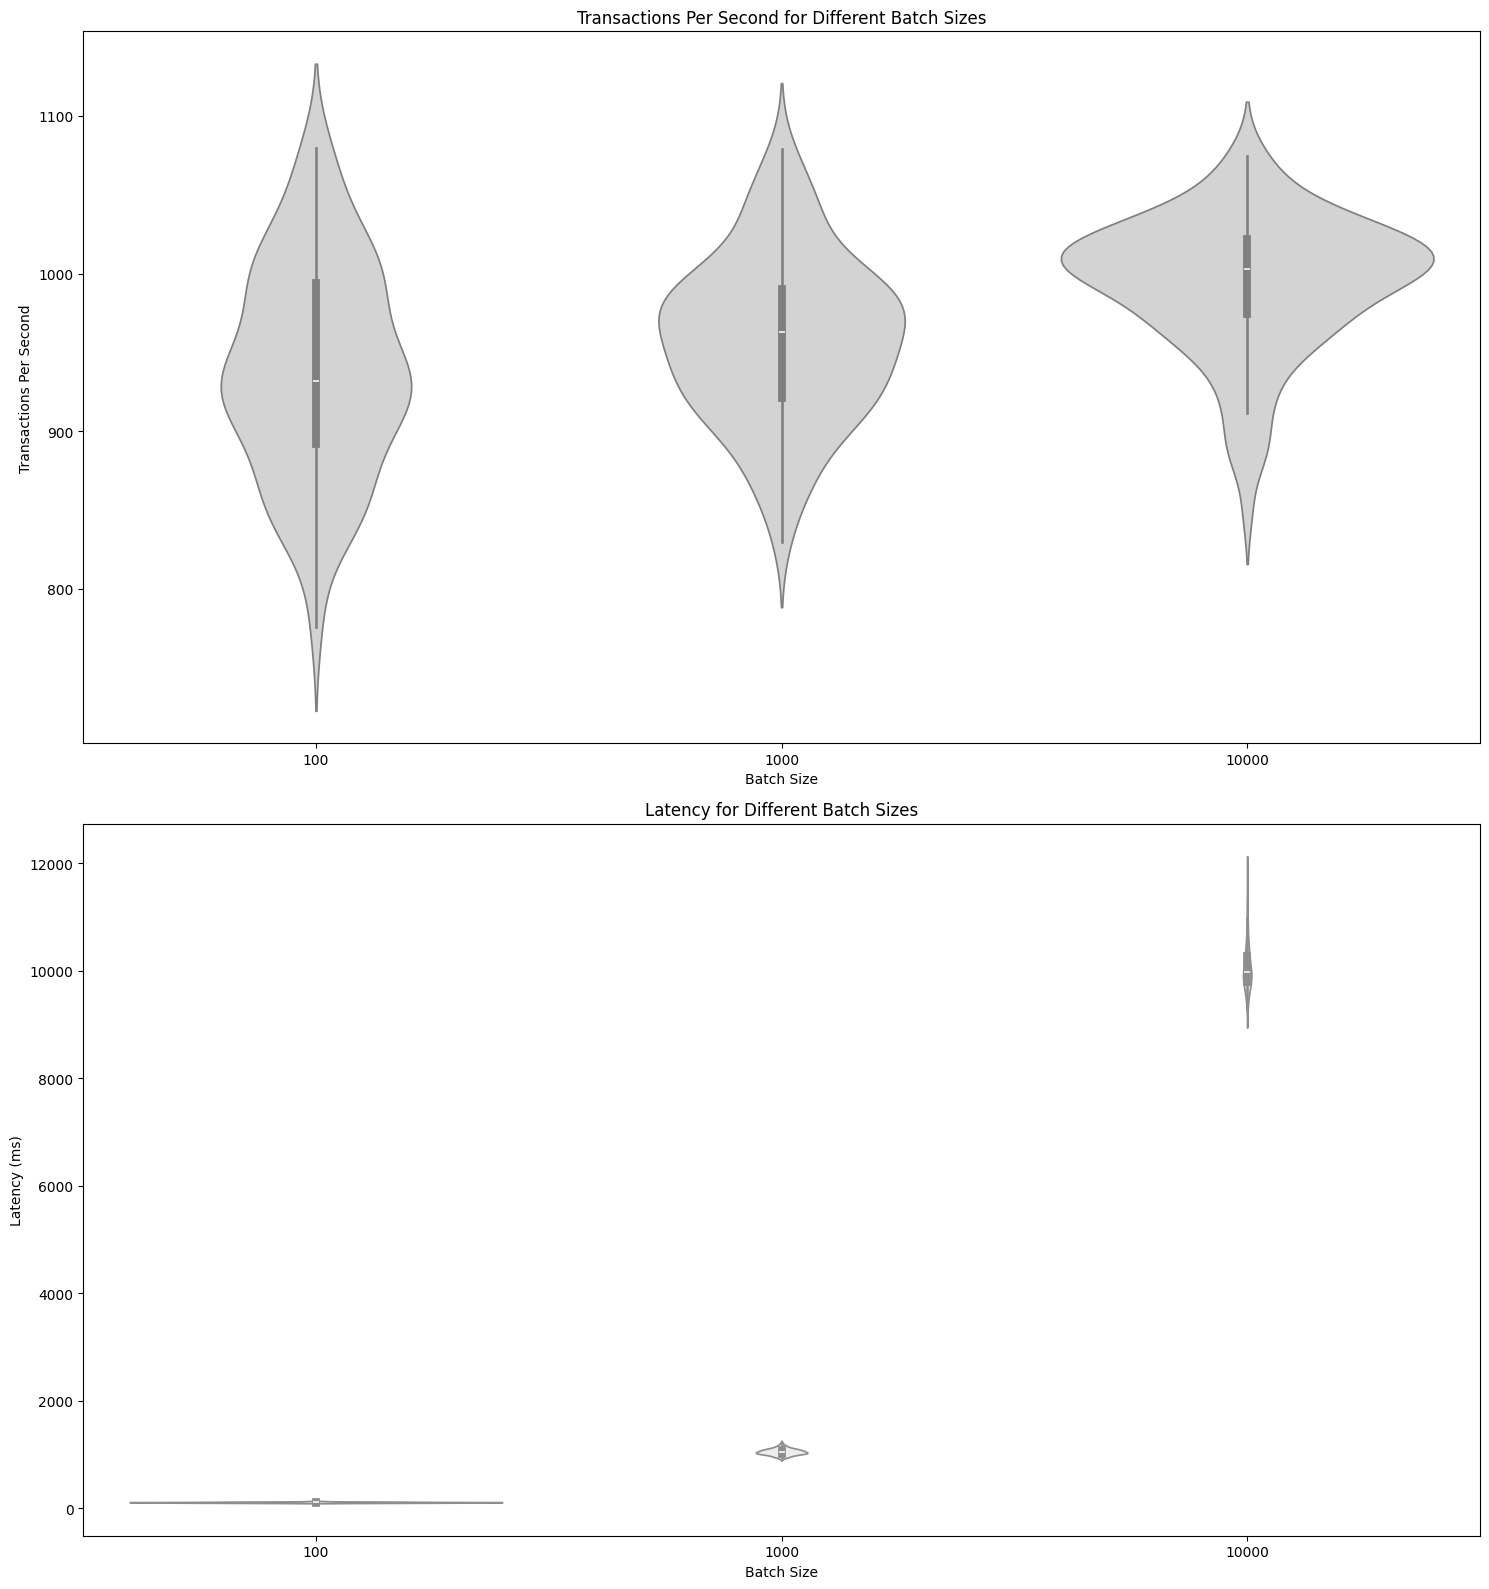

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'write_log.csv'
data = pd.read_csv(file_path)

data_insertion = data[data['transaction_type'] == 'insertion']

fig, axes = plt.subplots(2, 1, figsize=(15, 16))

sns.violinplot(ax=axes[0], x='record_count', y='transactions_per_second', data=data_insertion, color="lightgrey")
#axes[0].set_title('Transactions per second for different batch sizes')
axes[0].set_xlabel('Batch size')
axes[0].set_ylabel('Transactions per second (Throughput)')



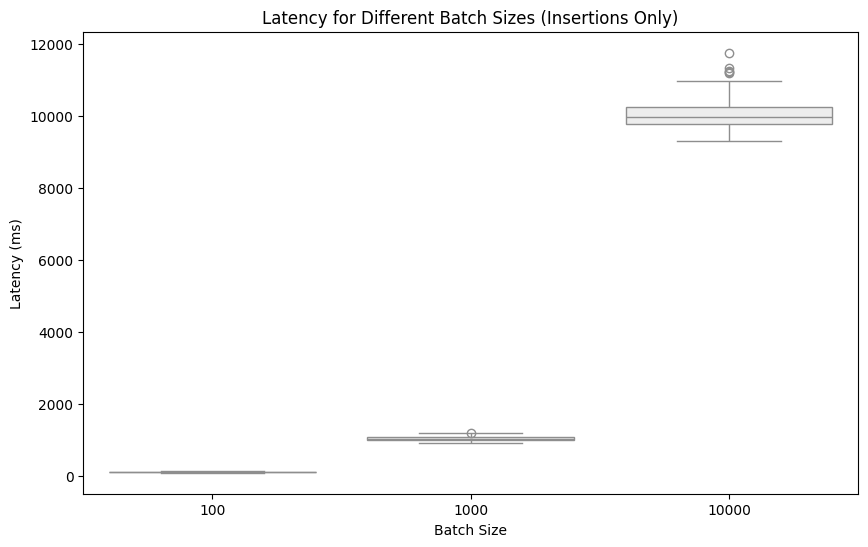

In [ ]:
file_path = 'write_log.csv'
data = pd.read_csv(file_path)

data_insertion = data[data['transaction_type'] == 'insertion']

plt.figure(figsize=(10, 6))
sns.boxplot(x='record_count', y='latency_ms', data=data_insertion)
plt.title('Latency for different batch sizes (only insertions)')
plt.xlabel('Batch Size')
plt.ylabel('Latency (ms)')
plt.show()


<ipython-input-7-5e51196e56f7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latency_comparison['read_higher'] = latency_comparison['latency_ms_mean'] > latency_comparison['metrics_latency_ms_mean']


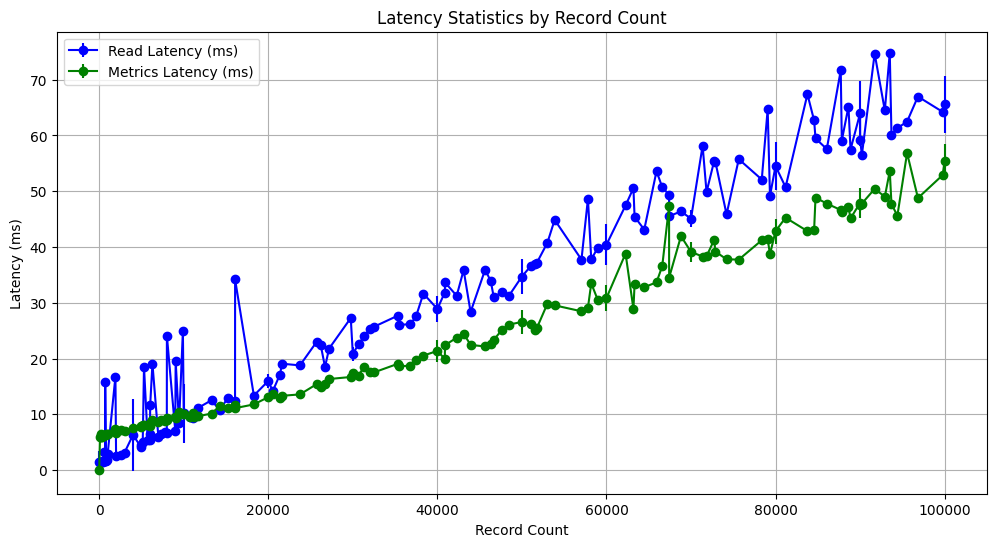

In [ ]:
read_log_path = 'read_log.csv'
read_log = pd.read_csv(read_log_path)

latency_stats = read_log.groupby('record_count').agg({
    'latency_ms': ['mean', 'std'],
    'metrics_latency_ms': ['mean', 'std']
}).reset_index()

latency_stats.columns = ['record_count', 'latency_ms_mean', 'latency_ms_std', 'metrics_latency_ms_mean', 'metrics_latency_ms_std']

latency_comparison = latency_stats[['record_count', 'latency_ms_mean', 'metrics_latency_ms_mean']]
latency_comparison['read_higher'] = latency_comparison['latency_ms_mean'] > latency_comparison['metrics_latency_ms_mean']

fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(latency_stats['record_count'], latency_stats['latency_ms_mean'], yerr=latency_stats['latency_ms_std'], fmt='-o', color='blue', label='Read Latency (ms)')
ax.errorbar(latency_stats['record_count'], latency_stats['metrics_latency_ms_mean'], yerr=latency_stats['metrics_latency_ms_std'], fmt='-o', color='green', label='Metrics Latency (ms)')

ax.set_xlabel('Record Count')
ax.set_ylabel('Latency (ms)')
#ax.set_title('Latency statistics by record count')
ax.legend()
ax.grid(True)

plt.show()

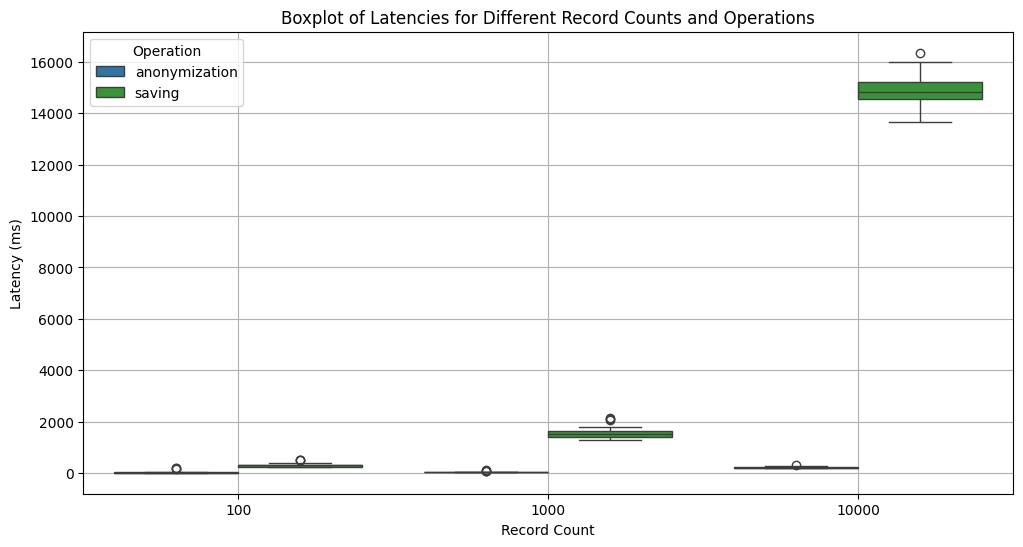

In [ ]:
file_1 = 'anonymization_log_1.csv'
file_2 = 'anonymization_log_2.csv'
file_3 = 'anonymization_log_3.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

combined_df['start_time'] = pd.to_datetime(combined_df['startTime'])
combined_df['end_time'] = pd.to_datetime(combined_df['endTime'])
combined_df['latency_ms'] = (combined_df['end_time'] - combined_df['start_time']).dt.total_seconds() * 1000

custom_colors = ['#1f77b4', '#2ca02c']

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='recordCount', y='latency_ms', hue='operation', palette=custom_colors)
# plt.title('Boxplot of Latencies for different record counts and operations')
plt.xlabel('Record Count')
plt.ylabel('Latency (ms)')
plt.legend(title='Operation')
plt.grid(True)
plt.show()